In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [4]:
#Create dummy variable 
geography = pd.get_dummies(X['Geography'], drop_first='True')
gender = pd.get_dummies(X['Gender'], drop_first='True')


In [5]:
X = pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [6]:
X = X.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [7]:
#Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [24]:
# Initialize ANN
classifier = Sequential()

# Adding input and first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))

# Adding second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

# Adding output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting ANN to Training set
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 4s 2ms/step - loss: 0.6345 - accuracy: 0.6359 - val_loss: 0.5159 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4839 - accuracy: 0.7979 - val_loss: 0.4692 - val_accuracy: 0.7963
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4464 - accuracy: 0.8043 - val_loss: 0.4431 - val_accuracy: 0.8114
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4244 - accuracy: 0.8158 - val_loss: 0.4287 - val_accuracy: 0.8107
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4036 - accuracy: 0.8257 - val_loss: 0.4123 - val_accuracy: 0.8247
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3830 - accuracy: 0.8391 - val_loss: 0.4022 - val_accuracy: 0.8364
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3710 - accuracy: 0.8451 - val_loss: 0.3954 - val_accuracy: 0.8357

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3268 - accuracy: 0.8628 - val_loss: 0.3626 - val_accuracy: 0.8542
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3266 - accuracy: 0.8662 - val_loss: 0.3619 - val_accuracy: 0.8561
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.8630 - val_loss: 0.3610 - val_accuracy: 0.8542
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8647 - val_loss: 0.3607 - val_accuracy: 0.8538
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3260 - accuracy: 0.8627 - val_loss: 0.3604 - val_accuracy: 0.8538
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3259 - accuracy: 0.8649 - val_loss: 0.3604 - val_accuracy: 0.8554
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3258 - accuracy: 0.8643 - val_loss: 0.3598 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


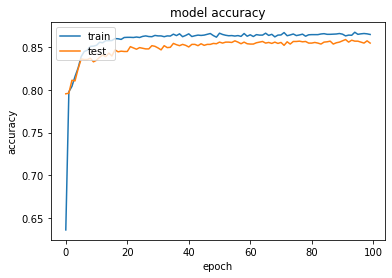

In [26]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

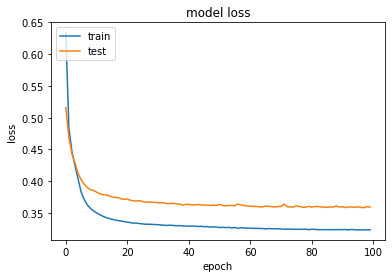

In [27]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 979us/step


In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1538,   57],
       [ 219,  186]], dtype=int64)

In [30]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)